# Hawkes Processes

## Statistics plots (Cluster size and duration probability distribution)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def algorithm(rate, mu, n):
    """
    Algorithm that computes interevent times and Hawkes intensity

    #Output: rate x_k, x_k
    """                                    
    # Paso 1
    u1 = np.random.uniform()
    if mu == 0:
        F1 = np.inf
    else:
        F1 = -np.log(u1) / mu

    # Paso 2
    u2 = np.random.uniform()
    if (rate - mu) == 0:
        G2 = 0
    else:
        G2 = 1 + np.log(u2) / (rate - mu)
        

    # Paso 3
    if G2 <= 0:
        F2 = np.inf
    else:
        F2 = -np.log(G2)

    # Paso 4
    xk = min(F1, F2)

    # Paso 5
    rate_tk = (rate - mu) * np.exp(-xk) + n + mu
    return rate_tk, xk 

In [20]:
def generate_series(K, n, mu):
    """
    Generates temporal series for K Hawkes processes
    
    ##Inputs:
    K: Number of events
    n: Strength of the Hawkes process
    mu: Background intensity 

    ##Output:
    times: time series the events
    rate: time series for the intensity
    """
    times_between_events = [0]
    rate = [mu]
    for _ in range(K):
        rate_tk, xk = algorithm(rate[-1], mu, n)
        rate.append(rate_tk)
        times_between_events.append(xk)
    times = np.cumsum(times_between_events)
    return times, rate

In [21]:
def identify_clusters(times, delta):
    """
    Identifies clusters in a temporal series given a resolution parameter delta
    
    ## Inputs:
    times: temporal series
    delta: resolution parameter

    ## Output:
    clusters: list of clusters
    """
    clusters = []
    current_cluster = []
    for i in range(len(times) - 1):
        if times[i + 1] - times[i] <= delta:
            if not current_cluster:
                current_cluster.append(times[i])
            current_cluster.append(times[i + 1])
        else:
            if current_cluster:
                clusters.append(current_cluster)
                current_cluster = []
    return clusters

For $\mu = 10^{-4}$,  $\Delta_1^*=\dfrac{log(K)}{\mu+\sqrt{2\mu K}}$

# TODO

- Implementar escalado logarítmico (correo)
- Hacer figuras con $K=10^{6,7,8}$ (8 cuando las otras dos estén manejadas)
- Imprimir el número de cluster para cada uno
- Reproducir figuras para puntos naranjas y rojos
- Repetir para $\mu=10^2$ CUIDADO que $\Delta^*$ se define de otra forma!! 

# $K = 10^6$ events
$n=1$, $\mu=10^{-4}$

In [22]:
K = 10**6
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

In [23]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

deltas = [delta1, delta1*10]

clusters = identify_clusters(times, delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu}, $Delta={delta1}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+06, n=1, mu=0.0001, $Delta=0.9768972124026539$: 411 


$\Delta = \Delta_1^*$

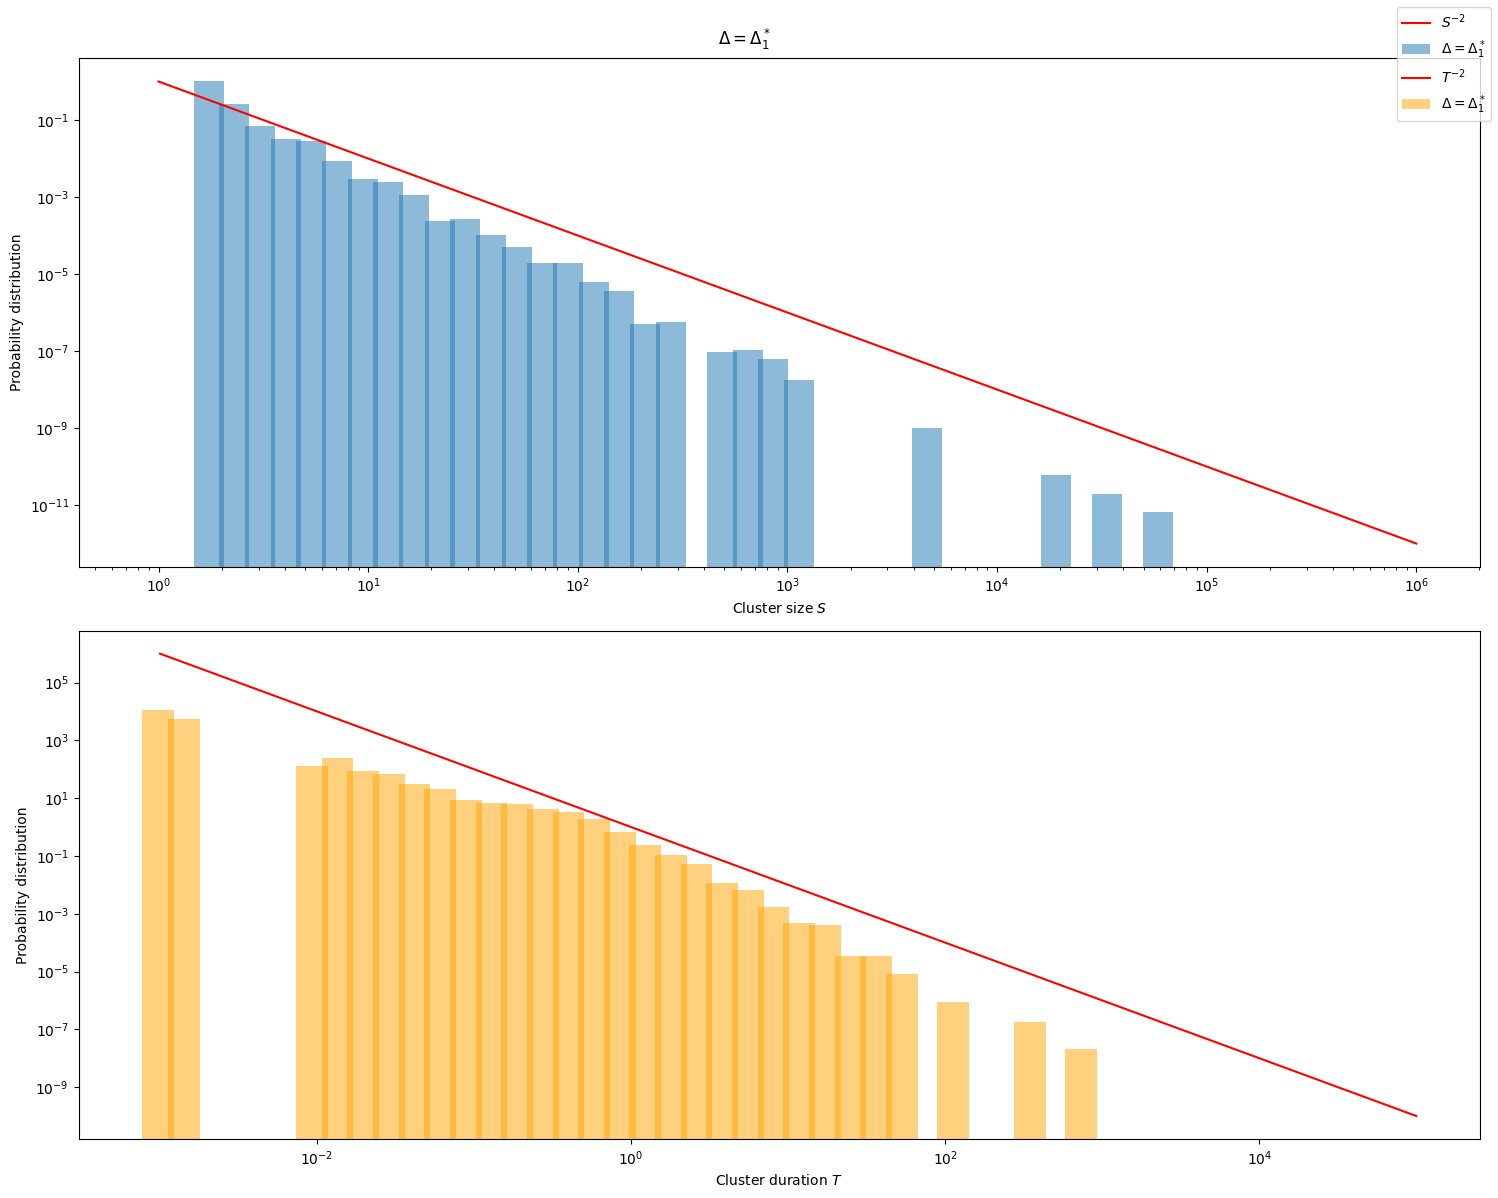

In [24]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

fig.legend()
fig.suptitle('$\Delta=\Delta_1^*$')
fig.tight_layout()


$\Delta = 10 \Delta_1^*$

In [25]:
clusters = identify_clusters(times, 10*delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu:.0E}, $Delta={10*delta1:2.E}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+06, n=1, mu=0.0001, $Delta=9.76897212402654$: 232 


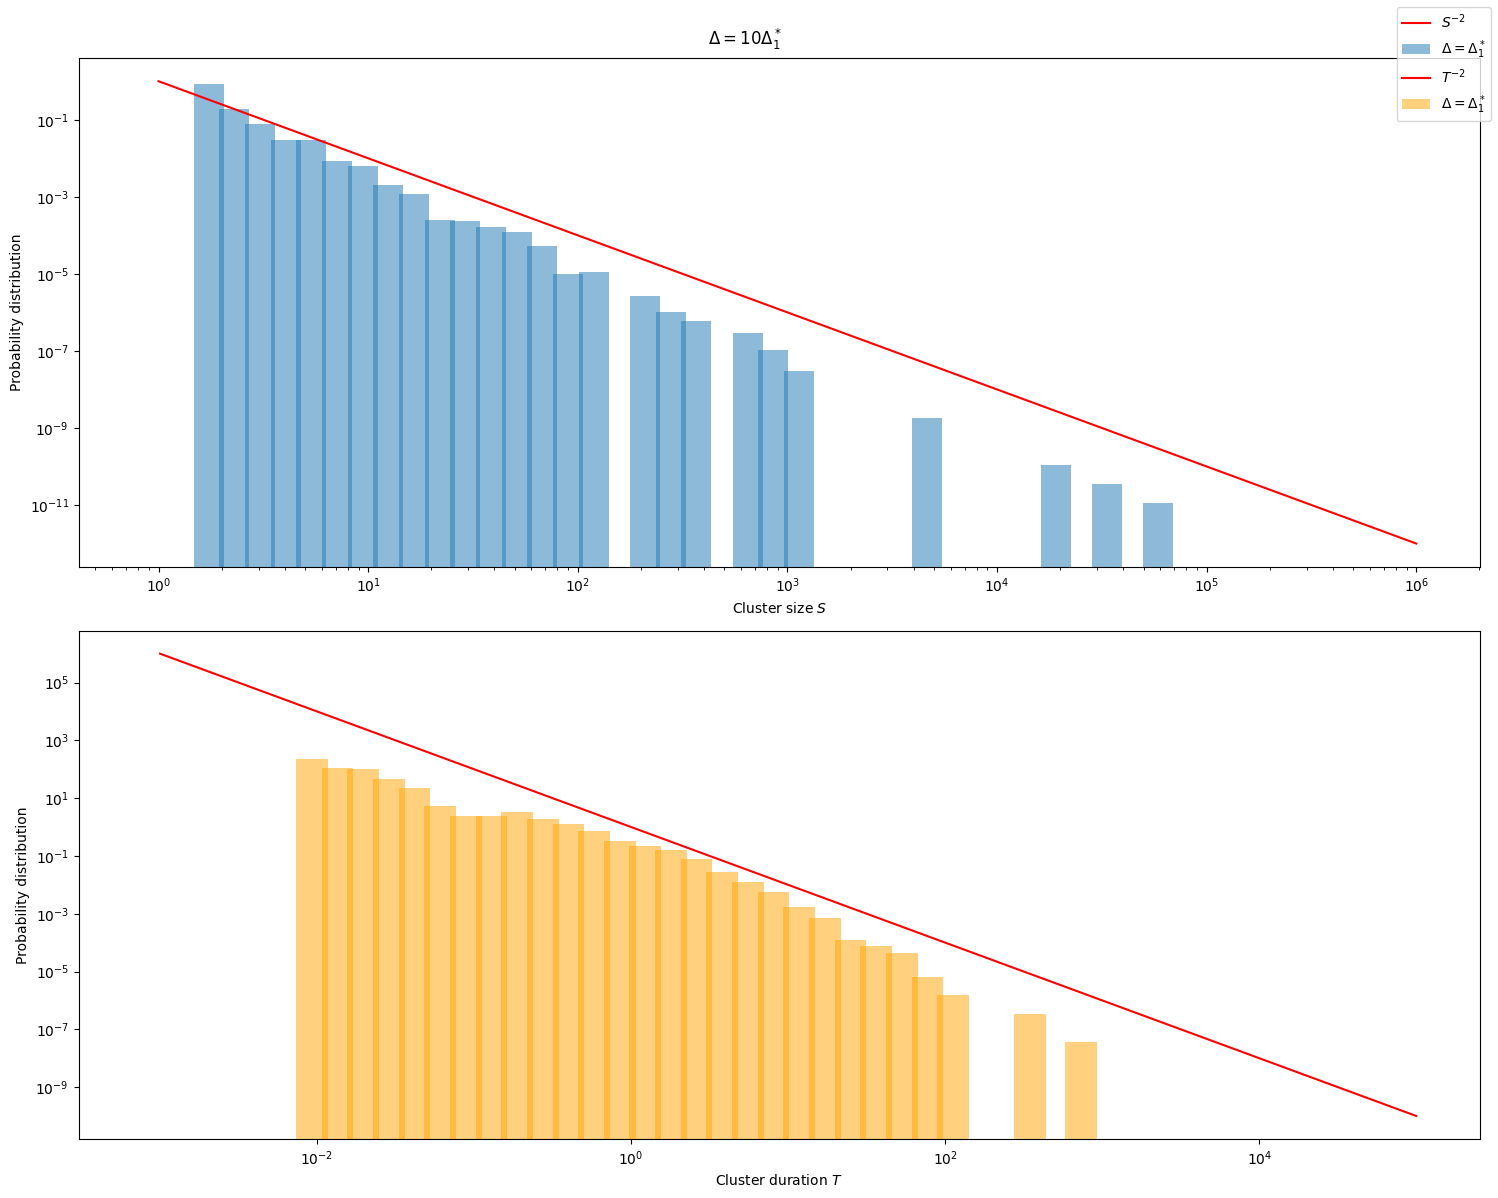

In [26]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

fig.legend()
fig.suptitle('$\Delta=10\Delta_1^*$')
fig.tight_layout()


## Scatter plot

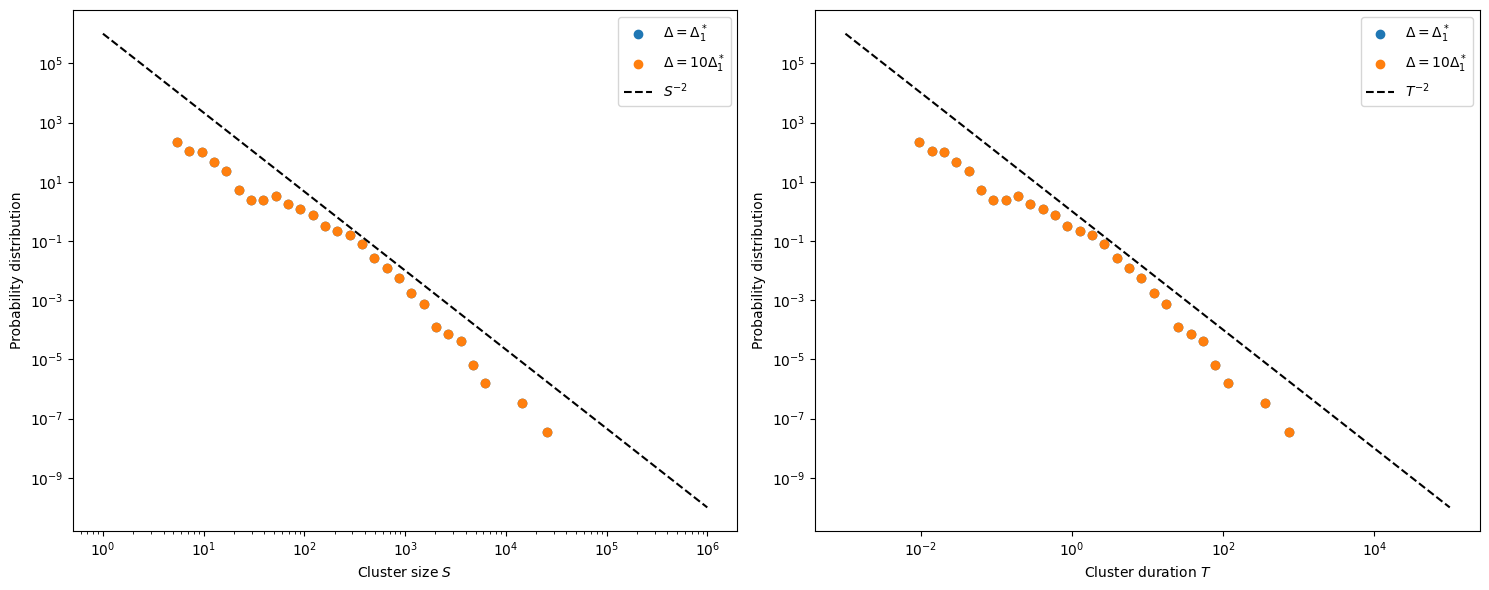

In [27]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1, delta1*10]
labels = ['$\Delta=\Delta_1^*$', '$\Delta=10\Delta_1^*$']

fig = plt.figure(figsize=(15, 6))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

for i in range(len(deltas)):
    clusters = identify_clusters(times, deltas[i])

    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_bins = np.logspace(0, 6, num = 50, base = 10)
    y = s_bins**-2
    s_widths = (s_bins[1:] - s_bins[:-1])
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    s_hist_norm = hist[0]/s_widths

    
    ax0.scatter(s_bins[:-1], hist_norm, label=labels[i])
    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_xlabel('Cluster size $S$')
    ax0.set_ylabel('Probability distribution')


    t_bins = np.logspace(-3, 5, num = 50, base = 10)
    y = t_bins**-2
    t_widths = (t_bins[1:] - t_bins[:-1])
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    t_hist_norm = hist[0]/t_widths

    ax1.scatter(t_bins[:-1], hist_norm, label=labels[i])
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Cluster duration $T$')
    ax1.set_ylabel('Probability distribution')

    

ax0.plot(s_bins, y, label='$S^{-2}$', color='black', linestyle='--')
ax1.plot(t_bins, y, label='$T^{-2}$', color='black', linestyle='--')
ax0.legend()
ax1.legend()
fig.tight_layout()

# $K = 10^7$ events
$n=1$, $\mu=10^{-4}$

In [28]:
K = 10**7
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

In [29]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))

deltas = [delta1, delta1*10]

clusters = identify_clusters(times, delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu:.0E}, $Delta={delta1:.2E}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+07, n=1, mu=1E-04, $Delta=3.60E-01$: 12006 


$\Delta = \Delta_1^*$

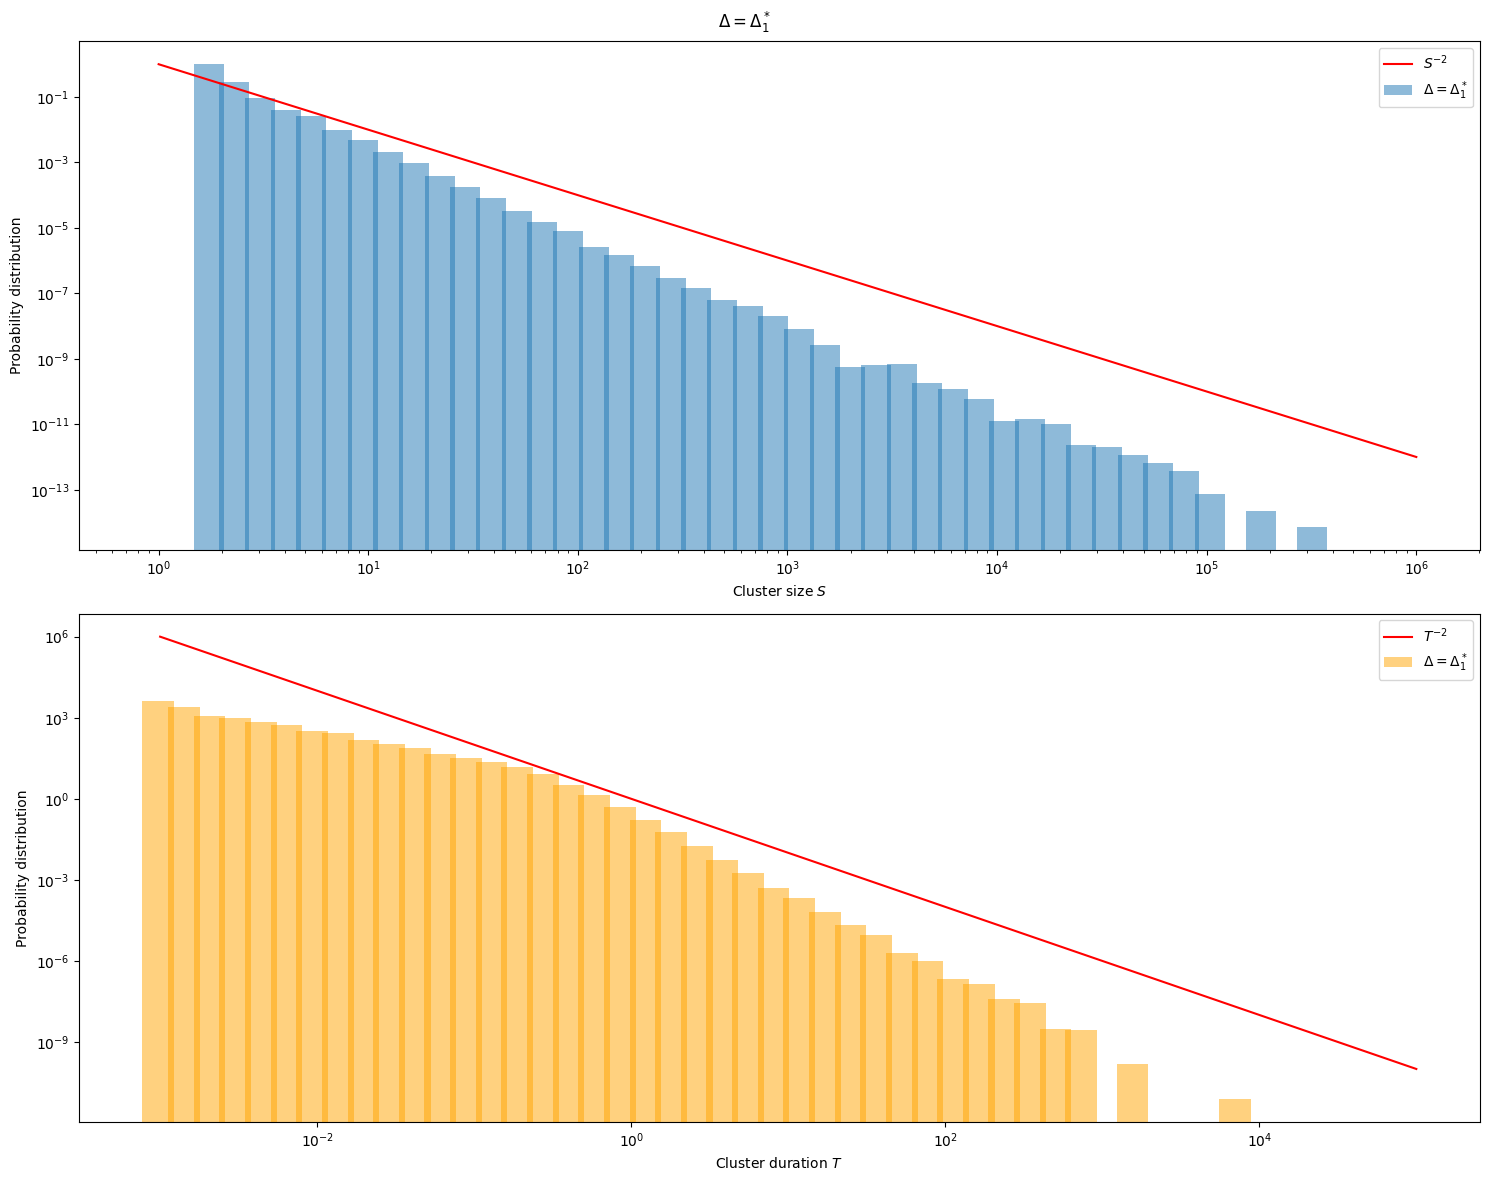

In [30]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

ax0.legend()
ax1.legend()
fig.suptitle('$\Delta=\Delta_1^*$')
fig.tight_layout()

$\Delta=10\Delta_1^*$

In [31]:
clusters = identify_clusters(times, 10*delta1)

print(f'Número de clusters para K={K:.0E}, n={n}, mu={mu:.0E}, $Delta={delta1:.2E}$: {len(clusters)} ')

cluster_sizes = [len(cluster) for cluster in clusters]
cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

Número de clusters para K=1E+07, n=1, mu=1E-04, $Delta=3.60E-01$: 2863 


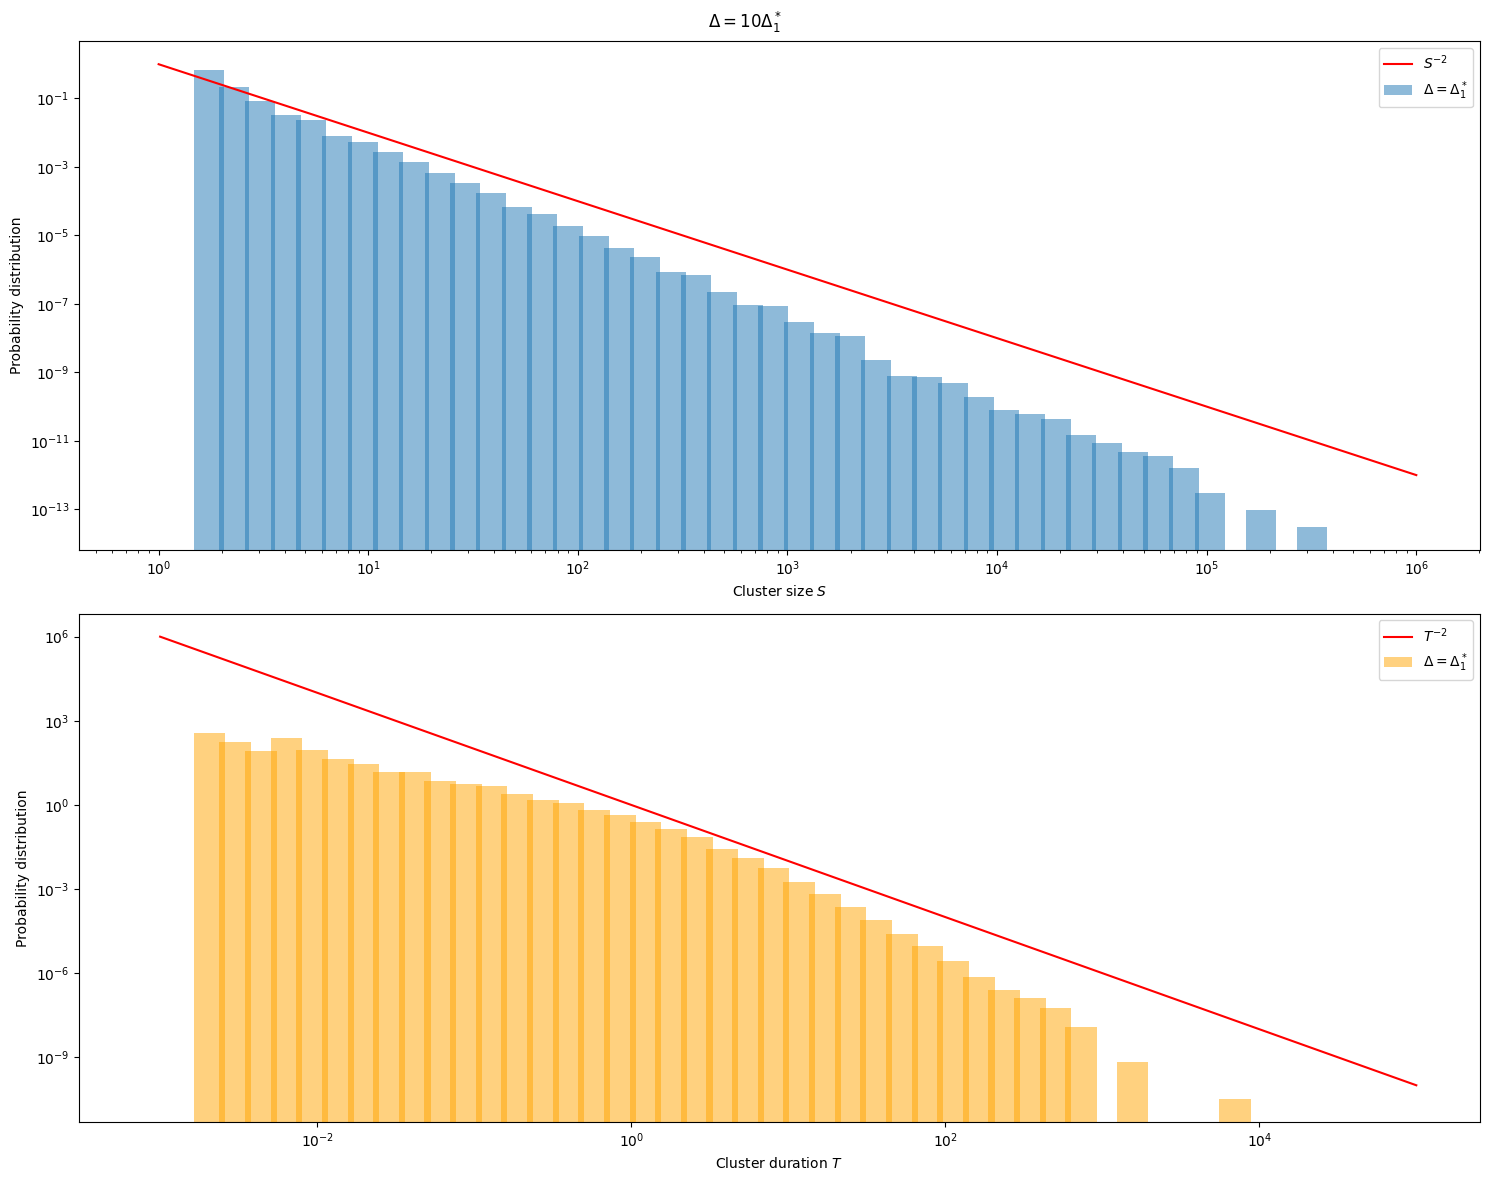

In [32]:
s_bins = np.logspace(0, 6, num = 50, base = 10)
y = s_bins**-2
s_widths = (s_bins[1:] - s_bins[:-1])
hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
hist_norm = hist[0]/s_widths


fig = plt.figure(figsize=(15, 12))
axgrid = fig.add_gridspec(2,1)

ax0 = fig.add_subplot(axgrid[0,0])
ax0.bar(s_bins[:-1], hist_norm, s_widths, label='$\Delta=\Delta_1^*$', alpha = 0.5)
ax0.plot(s_bins, y, label='$S^{-2}$', color='red')
ax0.set_xscale('log')
ax0.set_yscale('log')
ax0.set_xlabel('Cluster size $S$')
ax0.set_ylabel('Probability distribution')


t_bins = np.logspace(-3, 5, num = 50, base = 10)
y = t_bins**-2
widths = (t_bins[1:] - t_bins[:-1])
hist = np.histogram(cluster_times, bins=t_bins, density = True)
hist_norm = hist[0]/widths

ax1 = fig.add_subplot(axgrid[1,0])
ax1.bar(t_bins[:-1], hist_norm, widths, label='$\Delta=\Delta_1^*$', color='orange', alpha = 0.5)
ax1.plot(t_bins, y, label='$T^{-2}$', color='red')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel('Cluster duration $T$')
ax1.set_ylabel('Probability distribution')

ax0.legend()
ax1.legend()
fig.suptitle('$\Delta=10\Delta_1^*$')
fig.tight_layout()


## Scatter plot

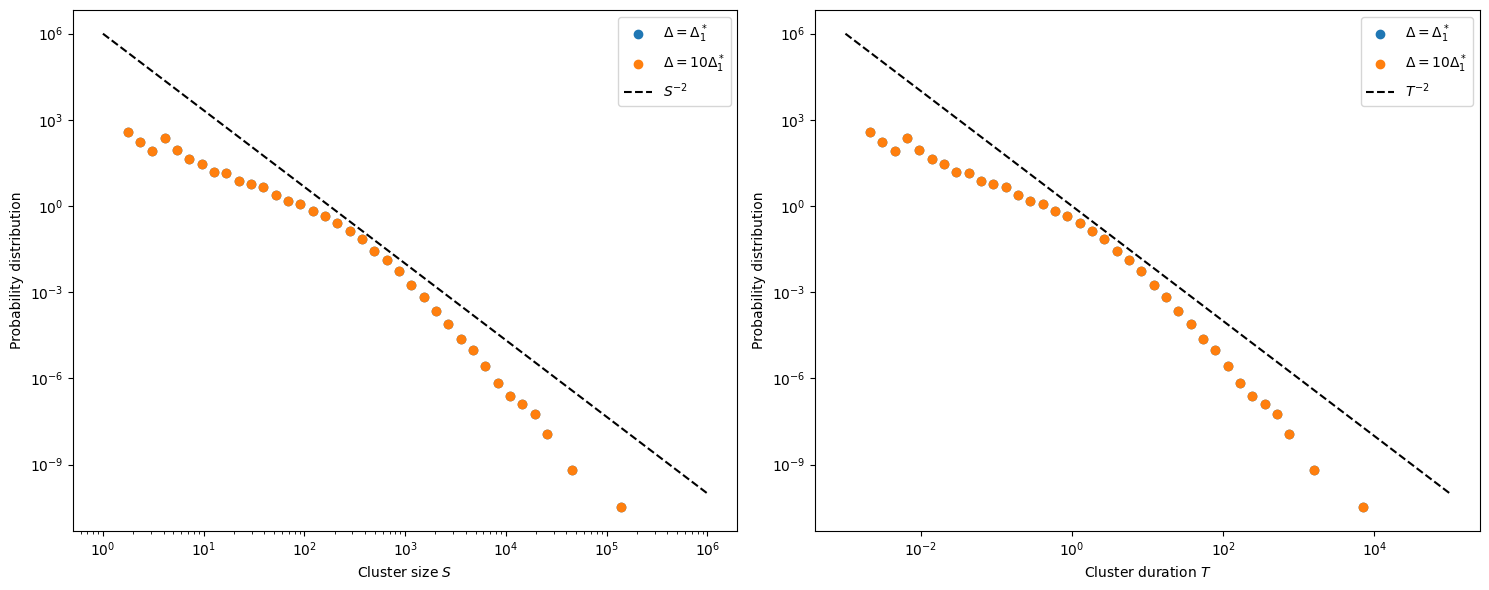

In [33]:
delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1, delta1*10]
labels = ['$\Delta=\Delta_1^*$', '$\Delta=10\Delta_1^*$']

fig = plt.figure(figsize=(15, 6))
axgrid = fig.add_gridspec(1,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[0,1])

for i in range(len(deltas)):
    clusters = identify_clusters(times, deltas[i])

    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_bins = np.logspace(0, 6, num = 50, base = 10)
    y = s_bins**-2
    s_widths = (s_bins[1:] - s_bins[:-1])
    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    s_hist_norm = hist[0]/s_widths

    
    ax0.scatter(s_bins[:-1], hist_norm, label=labels[i])
    ax0.set_xscale('log')
    ax0.set_yscale('log')
    ax0.set_xlabel('Cluster size $S$')
    ax0.set_ylabel('Probability distribution')


    t_bins = np.logspace(-3, 5, num = 50, base = 10)
    y = t_bins**-2
    t_widths = (t_bins[1:] - t_bins[:-1])
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    t_hist_norm = hist[0]/t_widths

    ax1.scatter(t_bins[:-1], hist_norm, label=labels[i])
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Cluster duration $T$')
    ax1.set_ylabel('Probability distribution')

    

ax0.plot(s_bins, y, label='$S^{-2}$', color='black', linestyle='--')
ax1.plot(t_bins, y, label='$T^{-2}$', color='black', linestyle='--')
ax0.legend()
ax1.legend()
fig.tight_layout()

# $K = 10^8$ events

$n=1$, $\mu=10^{-4}$

In [34]:
K = 10**8
n = 1
mu = 10**-4

times, rate = generate_series(K, n, mu)

KeyboardInterrupt: 

100 minutos